In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# July 2024
# License: MIT

In [2]:
import xgboost as xgb
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Training

In [4]:
d_train = xgb.DMatrix(X_train, y_train)

In [5]:
params = {'objective': 'binary:logistic',
          'eval_metric': ['error'],
          'seed': 42}

In [6]:
clf = xgb.train(params, d_train, num_boost_round=10)

In [7]:
print(clf.eval(d_train))

[0]	eval-error:0.00469483568075117


In [8]:
d_test = xgb.DMatrix(X_test, y_test)
print(clf.eval(d_test))

[0]	eval-error:0.03496503496503497


Prediction

In [9]:
test_samples = xgb.DMatrix(X_test[:5])
y_pred = clf.predict(test_samples)
print(y_pred)

[0.9661875  0.03187571 0.04126738 0.97855264 0.9803145 ]


In [10]:
labels = (y_pred > 0.5).astype(int)
print(labels)

[1 0 0 1 1]


Plotting Trees

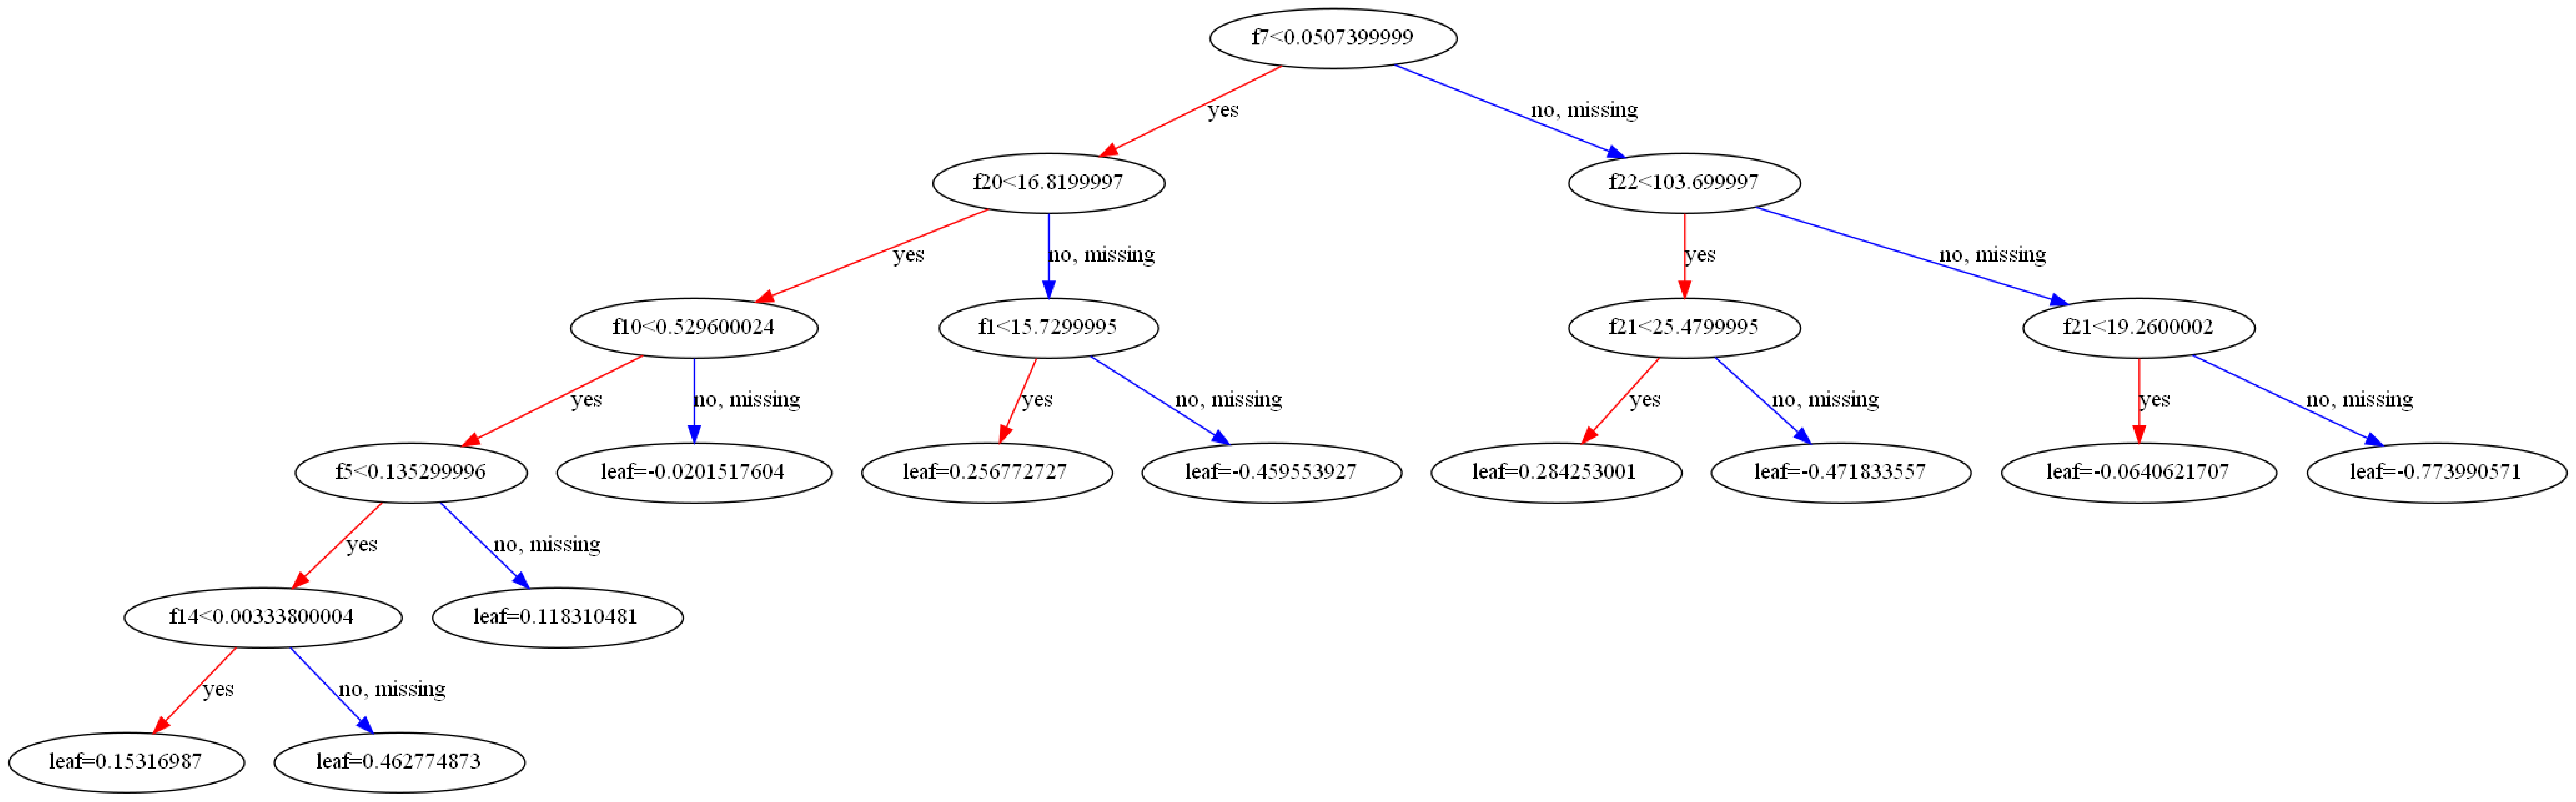

In [11]:
xgb.plot_tree(clf, tree_idx=0)
fig = plt.gcf()
fig.set_size_inches(150, 100)  # make the plot more readable
fig.savefig('figures/xgboost_decision_tree.pdf', dpi=200, bbox_inches='tight')